In [10]:
print('hello world ')
import warnings 
warnings.filterwarnings('ignore')

hello world 


In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.io as pio
pio.templates.default = "plotly_dark"
import plotly 
import plotly.graph_objs as go
import plotly.express as px
#import plotly.express as px

In [12]:
df=pd.read_csv(r"C:\Users\sagar\OneDrive\Desktop\MonkeyPox\monkeypox_df 28-06-2022.csv")
df.head()

,ID,Status,Location,City,Country,Age,Gender,Date_onset,Date_confirmation,Symptoms,...,Travel_history_country,Genomics_Metadata,Confirmation_method,Source,Source_II,Date_entry,Date_last_modified,Source_III,Source_IV,Country_ISO3
0,1.0,confirmed,Guy's and St Thomas Hospital London,London,England,NaN,NaN,2022-04-29,2022-05-06,rash,...,Nigeria,West African Clade,RT-PCR,https://www.gov.uk/government/news/monkeypox-c...,https://www.who.int/emergencies/disease-outbre...,2022-05-18,2022-05-18,NaN,NaN,GBR
1,2.0,confirmed,Guy's and St Thomas Hospital London,London,England,NaN,NaN,2022-05-05,2022-05-12,rash,...,NaN,West African Clade,RT-PCR,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN,GBR
2,3.0,confirmed,London,London,England,NaN,NaN,2022-04-30,2022-05-13,vesicular rash,...,NaN,West African Clade,RT-PCR,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN,GBR
3,4.0,confirmed,London,London,England,NaN,Male,NaN,2022-05-15,vesicular rash,...,NaN,West African Clade,NaN,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN,GBR
4,5.0,confirmed,London,London,England,NaN,Male,NaN,2022-05-15,vesicular rash,...,NaN,West African Clade,NaN,https://www.gov.uk/government/news/monkeypox-c...,NaN,2022-05-18,2022-05-18,NaN,NaN,GBR


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4512 non-null   float64
 1   Status                   4512 non-null   object 
 2   Location                 2395 non-null   object 
 3   City                     619 non-null    object 
 4   Country                  4512 non-null   object 
 5   Age                      994 non-null    object 
 6   Gender                   986 non-null    object 
 7   Date_onset               23 non-null     object 
 8   Date_confirmation        4119 non-null   object 
 9   Symptoms                 131 non-null    object 
 10  Hospitalised (Y/N/NA)    178 non-null    object 
 11  Date_hospitalisation     18 non-null     object 
 12  Isolated (Y/N/NA)        228 non-null    object 
 13  Date_isolation           14 non-null     object 
 14  Outcome                 

In [14]:
#checking out the null values inside the data
df.isnull().mean()

ID                         0.000222
Status                     0.000222
Location                   0.469311
City                       0.862841
Country                    0.000222
Age                        0.779747
Gender                     0.781520
Date_onset                 0.994904
Date_confirmation          0.087303
Symptoms                   0.970973
Hospitalised (Y/N/NA)      0.960558
Date_hospitalisation       0.996012
Isolated (Y/N/NA)          0.949479
Date_isolation             0.996898
Outcome                    0.999778
Contact_comment            0.987813
Contact_ID                 0.997784
Contact_location           0.999114
Travel_history (Y/N/NA)    0.956348
Travel_history_entry       0.996012
Travel_history_start       0.998892
Travel_history_location    0.989142
Travel_history_country     0.988921
Genomics_Metadata          0.994682
Confirmation_method        0.979171
Source                     0.000222
Source_II                  0.695768
Date_entry                 0

In [15]:
df1=df[['Date_confirmation','ID']].groupby('Date_confirmation').agg('count').reset_index()
df1['Accumuated Cases']=df1['ID'].cumsum()
df1.rename({'ID':'Count'},axis=1,inplace=True)

In [16]:
fig=px.line(df1,x='Date_confirmation',y='Accumuated Cases',markers=True,title='Daily Cases Line Graph')
fig.show()

In [17]:
from wordcloud import WordCloud,STOPWORDS

In [18]:
df['Symptoms'].unique()

array(['rash', 'vesicular rash', 'skin lesions, ulcerative lesions',
       'ulcerative lesions', nan, 'oral and genital ulcers, fever',
       'lesions', 'perianal papules; inguinal adenopathy',
       'genital ulcers', 'genital rash',
       'Slight swallowing difficulties and an elevated temperature',
       'fever, rash', 'skin rashes', 'fever, lesions', 'pustules, fever',
       'skin lesions', 'fever, cough, skin lesions',
       'fever, pustules on hands, body pains', 'blisters, high fever',
       'genital ulcer lesions', 'muscle aches, fever, skin lesions',
       'blisters', 'fever, skin lesions',
       'erythema with vesicles and papules, difficulty breathing, headache, fever',
       'skin lesions, spots on skin, severe anemia',
       'skin lesions, headaches, enlarged lymph nodes, fever',
       'fever, fatigue, headache, muscle pain',
       'skin rashes, dysphagia, muscle pain, fever, decreased physical strength, enlarged lymph nodes',
       'fever, outbreak on the sk

In [25]:
df['Symptoms']=df['Symptoms'].str.lstrip()
print(df['Symptoms'].unique())

['rash' 'vesicular rash' 'skin lesions, ulcerative lesions'
 'ulcerative lesions' nan 'oral and genital ulcers, fever' 'lesions'
 'perianal papules; inguinal adenopathy' 'genital ulcers' 'genital rash'
 'Slight swallowing difficulties and an elevated temperature'
 'fever, rash' 'skin rashes' 'fever, lesions' 'pustules, fever'
 'skin lesions' 'fever, cough, skin lesions'
 'fever, pustules on hands, body pains' 'blisters, high fever'
 'genital ulcer lesions' 'muscle aches, fever, skin lesions' 'blisters'
 'fever, skin lesions'
 'erythema with vesicles and papules, difficulty breathing, headache, fever'
 'skin lesions, spots on skin, severe anemia'
 'skin lesions, headaches, enlarged lymph nodes, fever'
 'fever, fatigue, headache, muscle pain'
 'skin rashes, dysphagia, muscle pain, fever, decreased physical strength, enlarged lymph nodes'
 'fever, outbreak on the skin, hands, and chest' 'Fever, skin rashes'
 'Fever, chills, fatigue, headache, skin lesions'
 'fever, muscle pain, rash'
 'he

In [19]:
import nltk
from nltk.corpus import words
from nltk.metrics.distance import(edit_distance,jaccard_distance)
from nltk.util import ngrams
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sagar\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
import textdistance
import re
from collections import Counter
V=set[df]
V=set(df[''])


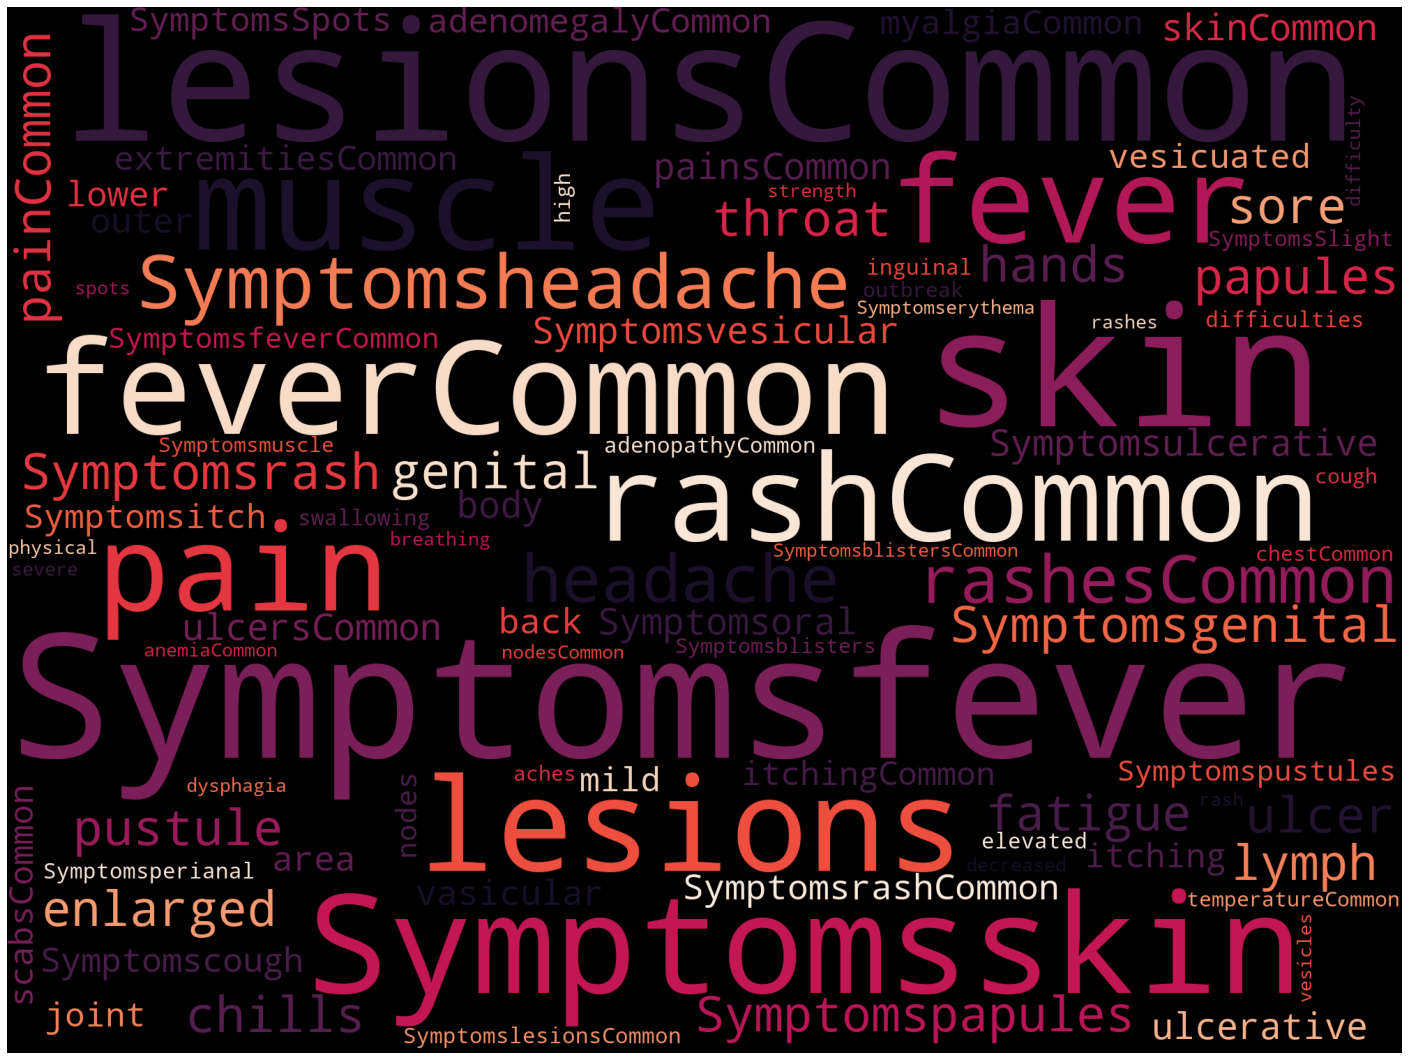

In [11]:
text ="Common Symptoms".join(cat for cat in df['Symptoms'].value_counts().index)
stop_words =list(STOPWORDS)+ ["on", "the", ";",",","of","an","and"]
wordcloud = WordCloud(width=2000,height=1500,stopwords=stop_words,background_color='black',
                     colormap='rocket_r',collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [24]:
fig = px.pie(df, values=df['Symptoms'].value_counts().nlargest(10), names=df['Symptoms'].value_counts().nlargest(10).index
             , title='10 Common Symptoms',hole = .55)
fig.show()